## ERDAP with erddapy example for ENGR Ice Prawler - 2019 Test

__pyversion__==3.7   
__author__==S.Bell

In [1]:
import datetime
print("Last run {0}".format(datetime.datetime.now()))

Last run 2019-06-17 12:12:14.192142


### connecting and basic information

In [2]:
import warnings
#remove the numpy/pandas/cython warnings
warnings.filterwarnings(action='ignore', message="numpy.dtype size changed,")

from erddapy import ERDDAP
import pandas as pd
import numpy as np

server_url = 'http://heron.pmel.noaa.gov:8080/erddap'

e = ERDDAP(server=server_url)

In [3]:
df = pd.read_csv(e.get_search_url(response='csv', search_for='PRAWLER'))

In [4]:
'We have {} tabledap, {} griddap, and {} wms endpoints.'.format(
    len(set(df['tabledap'].dropna())),
    len(set(df['griddap'].dropna())),
    len(set(df['wms'].dropna()))
)

'We have 8 tabledap, 0 griddap, and 0 wms endpoints.'

In [5]:
prawlers = df['Dataset ID'].values
print(prawlers)

['FCOM0001_PRAWE_0001' 'FCOM0001_PRAWC_0001' 'TELO9999_PRAWE_0002'
 'TELO9999_PRAWC_0002' 'TELOF001_PRAWE_F001' 'TELOF001_PRAWC_F001'
 'TELON001_PRAWE_N001' 'TELON001_PRAWC_N001']


In [6]:
variables = [e.get_var_by_attr(dataset_id=prawler, standard_name=lambda v: v is not None) for prawler in prawlers]
print(variables)

[['time', 'Depth', 'IRate', 'ETimer', 'SRate'], ['SB_Depth', 'wetlab_Chlorophyll', 'Optode_Temp', 'SB_Temp', 'SB_Conductivity', 'time', 'wetlab_FDOM', 'Optode_Dissolved_O2'], ['time', 'Depth', 'IRate', 'ETimer', 'SRate'], ['SB_Depth', 'wetlab_Chlorophyll', 'Epoch_Time', 'Optode_Temp', 'SB_Temp', 'SB_Conductivity', 'time', 'wetlab_FDOM', 'Optode_Dissolved_O2'], ['time', 'Depth', 'IRate', 'ETimer', 'SRate'], ['SB_Depth', 'wetlab_Chlorophyll', 'Epoch_Time', 'Optode_Temp', 'SB_Temp', 'SB_Conductivity', 'time', 'wetlab_FDOM', 'Optode_Dissolved_O2'], ['time', 'Depth', 'IRate', 'ETimer', 'SRate'], ['SB_Depth', 'wetlab_Chlorophyll', 'Epoch_Time', 'Optode_Temp', 'SB_Temp', 'SB_Conductivity', 'time', 'wetlab_FDOM', 'Optode_Dissolved_O2']]


### retrieving and plotting data

In [21]:
d = ERDDAP(server=server_url,
           protocol='tabledap',
           response='csv',
          )

d.dataset_id='TELOF001_PRAWC_F001'

d.variables =  [
 'SB_Depth',
 'SB_Temp',
 'SB_Conductivity',
 'wetlab_Chlorophyll',
 'wetlab_FDOM',
 'Optode_Temp',
 "time",
 'Optode_Dissolved_O2'
]

d.constraints = {
    'time>=': '2019-01-01T00:00:00Z',
    'time<=': '2019-10-10T00:00:00Z',
}

In [22]:
d.get_download_url()

'http://heron.pmel.noaa.gov:8080/erddap/tabledap/TELOF001_PRAWC_F001.csv?SB_Depth,SB_Temp,SB_Conductivity,wetlab_Chlorophyll,wetlab_FDOM,Optode_Temp,time,Optode_Dissolved_O2&time>=1546300800.0&time<=1570665600.0'

In [23]:
df = d.to_pandas(
    index_col='time (UTC)',
    parse_dates=True,
    skiprows=(1,)  # units information can be dropped.
).dropna()

df.head()

,SB_Depth (meters),SB_Temp (degree C),SB_Conductivity (S/m),wetlab_Chlorophyll (mg/L),wetlab_FDOM (NTU),Optode_Temp (degree C),Optode_Dissolved_O2 (\u00b5mol/L)
time (UTC),,,,,,,
2019-06-10 20:12:15+00:00,3.79,22.818,0.0,0.0,0.0,19.940,273.19
2019-06-10 20:12:23+00:00,4.92,22.818,0.0,0.0,0.0,19.933,273.22
2019-06-10 20:12:31+00:00,7.75,22.817,0.0,0.0,0.0,19.921,273.40
2019-06-10 20:12:39+00:00,8.22,22.818,0.0,0.0,0.0,19.931,273.29
2019-06-10 20:12:47+00:00,11.64,22.818,0.0,0.0,0.0,19.922,273.38


In [24]:
df.tail()

,SB_Depth (meters),SB_Temp (degree C),SB_Conductivity (S/m),wetlab_Chlorophyll (mg/L),wetlab_FDOM (NTU),Optode_Temp (degree C),Optode_Dissolved_O2 (\u00b5mol/L)
time (UTC),,,,,,,
2019-06-17 15:50:28+00:00,25.39,11.396,3.403,88.0,53.0,11.574,339.47
2019-06-17 15:50:36+00:00,27.05,11.383,3.402,95.0,55.0,11.489,331.54
2019-06-17 15:50:44+00:00,28.77,11.381,3.402,117.0,53.0,11.467,325.45
2019-06-17 15:50:52+00:00,30.70,11.374,3.401,90.0,53.0,11.441,320.39
2019-06-17 15:51:00+00:00,32.00,11.319,3.398,0.0,0.0,11.395,316.70


#### Temperature

In [25]:
#qc
df['SB_Temp (degree C)'][df['SB_Temp (degree C)']>20]=np.nan

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker

import cmocean

In [28]:
import matplotlib as mpl

### specify primary bulk figure parameters
fontsize = 10
labelsize = 10
#plotstyle = 'seaborn'
max_xticks = 10
plt.style.use('seaborn-ticks')
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['ps.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['pdf.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.minor.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 0.5
mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['ytick.minor.size'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 0.5
mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['xtick.color'] = 'black'

Text(0, 0.5, 'Depth (m)')

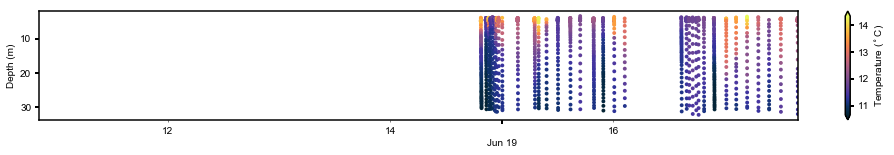

In [35]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['SB_Depth (meters)'], s=15, c=df['SB_Temp (degree C)'], marker='o', edgecolor='none', cmap=cmocean.cm.thermal)

ax.invert_yaxis()
ax.set_xlim(df.index[0], df.index[-1])
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(DayLocator(bymonthday=[30,15]))
ax.xaxis.set_minor_locator(DayLocator(range(0,32,2)))
ax.xaxis.set_minor_formatter(DateFormatter('%d'))
ax.xaxis.set_major_formatter(DateFormatter('%b %y'))
ax.xaxis.set_tick_params(which='major', pad=15)
ax.xaxis.set_tick_params(which='minor', pad=5)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Temperature ($^\circ$C)')
ax.set_ylabel('Depth (m)')

In [31]:
print("""
max temp: {0:0.4}
min temp: {1:0.4}""".format(df['SB_Temp (degree C)'].max(), df['SB_Temp (degree C)'].min()))


max temp: 14.35
min temp: 10.65


#### Conductivity

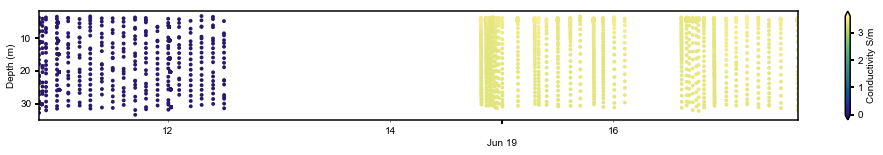

In [34]:
#plot
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['SB_Depth (meters)'], s=15, c=df['SB_Conductivity (S/m)'], marker='o', edgecolor='none', cmap=cmocean.cm.haline)

ax.invert_yaxis()
ax.set_xlim(df.index[0], df.index[-1])
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(DayLocator(bymonthday=[30,15]))
ax.xaxis.set_minor_locator(DayLocator(range(0,32,2)))
ax.xaxis.set_minor_formatter(DateFormatter('%d'))
ax.xaxis.set_major_formatter(DateFormatter('%b %y'))
ax.xaxis.set_tick_params(which='major', pad=15)
ax.xaxis.set_tick_params(which='minor', pad=5)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Conductivity S/m')
ax.set_ylabel('Depth (m)');

In [38]:
print("""
max cond: {0:0.4}
min cond: {1:0.4}""".format(df['SB_Conductivity (S/m)'].max(), df['SB_Conductivity (S/m)'].min()))



max cond: 3.602
min cond: 0.0


#### Salinity

In [55]:
import seawater as sw
#https://salinometry.com/pss-78/ for ratio
df['Salinity (PSU)'] = sw.salt(r=df['SB_Conductivity (S/m)']*10/42.914,
                               t=df['SB_Temp (degree C)'],
                               p=df['SB_Depth (meters)'])



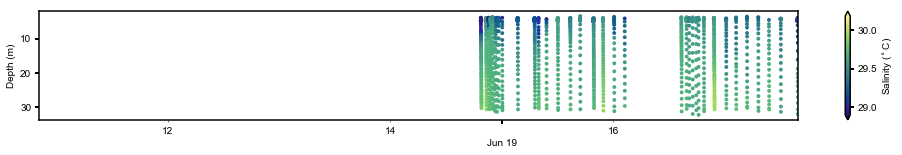

In [56]:
#bounds
lower = df['Salinity (PSU)'].mean()-3*df['Salinity (PSU)'].std()
upper = df['Salinity (PSU)'].mean()+3*df['Salinity (PSU)'].std()

#plot
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['SB_Depth (meters)'], s=15, c=df['Salinity (PSU)'], marker='o', edgecolor='none', vmin=lower, vmax=upper, cmap=cmocean.cm.haline)

ax.invert_yaxis()
ax.set_xlim(df.index[0], df.index[-1])
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(DayLocator(bymonthday=[30,15]))
ax.xaxis.set_minor_locator(DayLocator(range(0,32,2)))
ax.xaxis.set_minor_formatter(DateFormatter('%d'))
ax.xaxis.set_major_formatter(DateFormatter('%b %y'))
ax.xaxis.set_tick_params(which='major', pad=15)
ax.xaxis.set_tick_params(which='minor', pad=5)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Salinity ($^\circ$C)')
ax.set_ylabel('Depth (m)');

In [ ]:
print("""
max sal: {0:0.4}
min sal: {1:0.4}""".format(df['Salinity (PSU)'].max(), df['Salinity (PSU)'].min()))

print("""
mean sal: {0:0.4}
sal std: {1:04}""".format(df['Salinity (PSU)'].mean(),df['Salinity (PSU)'].std()))

#### Chlorophyl

Text(0, 0.5, 'Depth (m)')

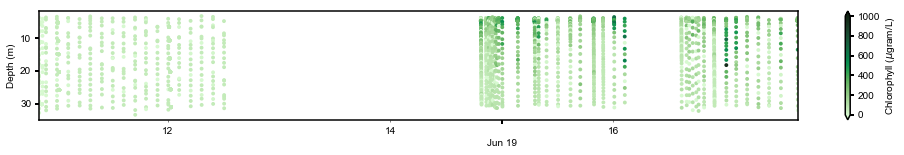

In [49]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['SB_Depth (meters)'], s=15, c=df['wetlab_Chlorophyll (mg/L)'], marker='o', edgecolor='none', vmin=0, vmax=1000, cmap=cmocean.cm.algae)

ax.invert_yaxis()
ax.set_xlim(df.index[0], df.index[-1])
#ax.set_xlim(datetime.datetime(2018,5,25),datetime.datetime.today())
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(DayLocator(bymonthday=[30,15]))
ax.xaxis.set_minor_locator(DayLocator(range(0,32,2)))
ax.xaxis.set_minor_formatter(DateFormatter('%d'))
ax.xaxis.set_major_formatter(DateFormatter('%b %y'))
ax.xaxis.set_tick_params(which='major', pad=15)
ax.xaxis.set_tick_params(which='minor', pad=5)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Chlorophyll ($\mu$gram/L)')
ax.set_ylabel('Depth (m)')


In [43]:
print("""
max chlorophyll: {0:0.4}
min chlorophyll: {1:0.4}""".format(df['wetlab_Chlorophyll (mg/L)'].max(), 
                                   df['wetlab_Chlorophyll (mg/L)'].min()))



max chlorophyll: 960.0
min chlorophyll: 0.0


#### Chlorophyl (log scale)

/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


Text(0, 0.5, 'Depth (m)')

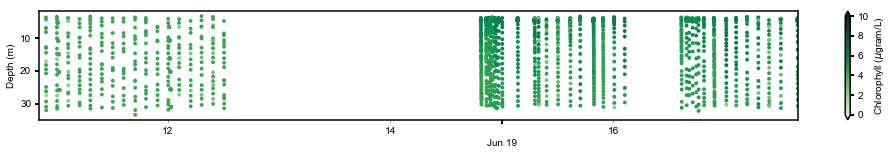

In [45]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['SB_Depth (meters)'], s=15, c=np.log(df['wetlab_Chlorophyll (mg/L)']), marker='o', edgecolor='none', vmin=0, vmax=10, cmap=cmocean.cm.algae)

ax.invert_yaxis()
ax.set_xlim(df.index[0], df.index[-1])
#ax.set_xlim(datetime.datetime(2018,5,25),datetime.datetime.today())
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(DayLocator(bymonthday=[30,15]))
ax.xaxis.set_minor_locator(DayLocator(range(0,32,2)))
ax.xaxis.set_minor_formatter(DateFormatter('%d'))
ax.xaxis.set_major_formatter(DateFormatter('%b %y'))
ax.xaxis.set_tick_params(which='major', pad=15)
ax.xaxis.set_tick_params(which='minor', pad=5)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Chlorophyll ($\mu$gram/L)')
ax.set_ylabel('Depth (m)')

#### Turb?

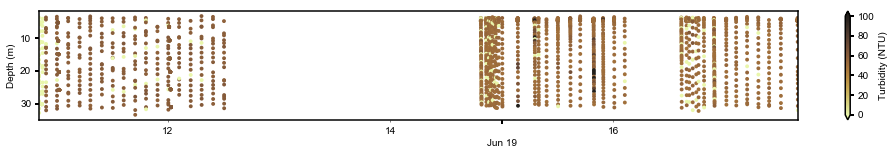

In [50]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['SB_Depth (meters)'], s=15, c=df['wetlab_FDOM (NTU)'], marker='o', edgecolor='none', vmin=0, vmax=100, cmap=cmocean.cm.turbid)

ax.invert_yaxis()
ax.set_xlim(df.index[0], df.index[-1])
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(DayLocator(bymonthday=[30,15]))
ax.xaxis.set_minor_locator(DayLocator(range(0,32,2)))
ax.xaxis.set_minor_formatter(DateFormatter('%d'))
ax.xaxis.set_major_formatter(DateFormatter('%b %y'))
ax.xaxis.set_tick_params(which='major', pad=15)
ax.xaxis.set_tick_params(which='minor', pad=5)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Turbidity (NTU)')
ax.set_ylabel('Depth (m)');

In [57]:
import seawater as sw
sigmat = sw.dens(s=df['Salinity (PSU)'],
                 t=df['SB_Temp (degree C)'],
                 p=df['SB_Depth (meters)']) - 1000.

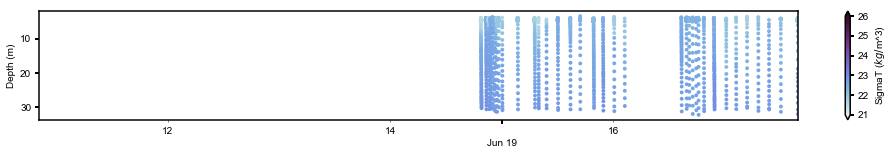

In [60]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['SB_Depth (meters)'], s=15, c=sigmat, marker='o', edgecolor='none', vmin=21, vmax=26, cmap=cmocean.cm.dense)

ax.invert_yaxis()
ax.set_xlim(df.index[0], df.index[-1])
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(DayLocator(bymonthday=[30,15]))
ax.xaxis.set_minor_locator(DayLocator(range(0,32,2)))
ax.xaxis.set_minor_formatter(DateFormatter('%d'))
ax.xaxis.set_major_formatter(DateFormatter('%b %y'))
ax.xaxis.set_tick_params(which='major', pad=15)
ax.xaxis.set_tick_params(which='minor', pad=5)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('SigmaT ($kg/$m^3)')
ax.set_ylabel('Depth (m)');

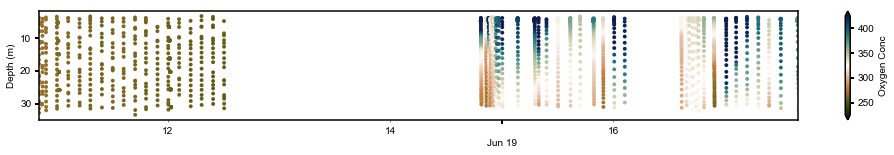

In [73]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['SB_Depth (meters)'], s=15, c=df['Optode_Dissolved_O2 (\\u00b5mol/L)'], marker='o', vmin=225, vmax=425, edgecolor='none', cmap=cmocean.cm.tarn)

ax.invert_yaxis()
ax.set_xlim(df.index[0], df.index[-1])
xfmt = mdates.DateFormatter('%H:%Mh\n%d-%b')
ax.xaxis.set_major_locator(DayLocator(bymonthday=[30,15]))
ax.xaxis.set_minor_locator(DayLocator(range(0,32,2)))
ax.xaxis.set_minor_formatter(DateFormatter('%d'))
ax.xaxis.set_major_formatter(DateFormatter('%b %y'))
ax.xaxis.set_tick_params(which='major', pad=15)
ax.xaxis.set_tick_params(which='minor', pad=5)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Oxygen Conc')
ax.set_ylabel('Depth (m)');

### Calibration/Characterization Profiles - last 7 day

In [ ]:
#groupby profile id


dfsub=df[(datetime.datetime.today()-datetime.timedelta(days=1)).strftime('%Y-%m-%d')]
dfsg = dfsub.groupby('profile_id')

In [74]:
df.keys()

Index(['SB_Depth (meters)', 'SB_Temp (degree C)', 'SB_Conductivity (S/m)',
       'wetlab_Chlorophyll (mg/L)', 'wetlab_FDOM (NTU)',
       'Optode_Temp (degree C)', 'Optode_Dissolved_O2 (\u00b5mol/L)',
       'Salinity (PSU)'],
      dtype='object')

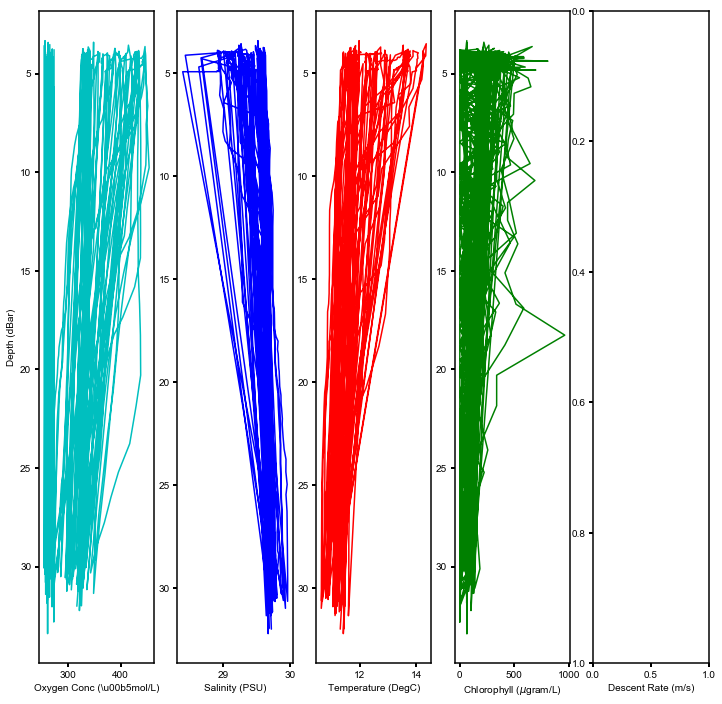

In [78]:
fig, ax = plt.subplots(1,5,figsize=(12, 12))


cs = ax[0].plot(df['Optode_Dissolved_O2 (\\u00b5mol/L)'],df['SB_Depth (meters)'],'c-')
cs = ax[1].plot(df['Salinity (PSU)'],df['SB_Depth (meters)'],'b-')
cs = ax[2].plot(df['SB_Temp (degree C)'],df['SB_Depth (meters)'],'r-')
cs = ax[3].plot(df['wetlab_Chlorophyll (mg/L)'],df['SB_Depth (meters)'],'g-')

ax[0].set_xlabel('Oxygen Conc (\\u00b5mol/L)')        
ax[0].set_ylabel('Depth (dBar)')        
ax[0].invert_yaxis()
ax[1].set_xlabel('Salinity (PSU)')        
ax[1].invert_yaxis()
ax[2].set_xlabel('Temperature (DegC)')        
ax[2].invert_yaxis()
ax[3].set_xlabel('Chlorophyll ($\mu$gram/L)')        
ax[3].invert_yaxis()
ax[4].set_xlabel('Descent Rate (m/s)')        
ax[4].invert_yaxis()

In [ ]:
fig, ax = plt.subplots(1,5,figsize=(12, 12))

for i,cast in enumerate(dfsg.groups):
    if dfsg.get_group(cast)['depth (m)'].std() > 1:
        cs = ax[0].plot(dfsg.get_group(cast)['Oxy_Sat (percent)'][1:],dfsg.get_group(cast)['SB_Depth (meters)'][1:],'c-')
        cs = ax[1].plot(dfsg.get_group(cast)['Salinity (PSU)'][1:],dfsg.get_group(cast)['depth (m)'][1:],'b-')
        cs = ax[2].plot(dfsg.get_group(cast)['Temperature'][1:],dfsg.get_group(cast)['depth (m)'][1:],'r-')
        cs = ax[3].plot(dfsg.get_group(cast)['Chlorophyll'][1:],dfsg.get_group(cast)['depth (m)'][1:],'g-')
        cs = ax[4].plot(dfsg.get_group(cast)['descentrate (m/s)'],dfsg.get_group(cast)['depth (m)'],'k-')
    else:
        cs = ax[0].plot(dfsg.get_group(cast)['Oxy_Sat (percent)'].last('s'),dfsg.get_group(cast)['depth (m)'].last('s'),'k+')
        cs = ax[1].plot(dfsg.get_group(cast)['Salinity (PSU)'].last('s'),dfsg.get_group(cast)['depth (m)'].last('s'),'k+')
        cs = ax[2].plot(dfsg.get_group(cast)['Temperature'].last('s'),dfsg.get_group(cast)['depth (m)'].last('s'),'k+')
        cs = ax[3].plot(dfsg.get_group(cast)['Chlorophyll'].last('s'),dfsg.get_group(cast)['depth (m)'].last('s'),'k+')

ax[0].set_xlabel('Oxygen %Sat')        
ax[0].set_ylabel('Depth (dBar)')        
ax[0].invert_yaxis()
ax[1].set_xlabel('Salinity (PSU)')        
ax[1].invert_yaxis()
ax[2].set_xlabel('Temperature (DegC)')        
ax[2].invert_yaxis()
ax[3].set_xlabel('Chlorophyll ($\mu$gram/m$^3$)')        
ax[3].invert_yaxis()
ax[4].set_xlabel('Descent Rate (m/s)')        
ax[4].invert_yaxis()